In [29]:
# import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
import warnings

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def plot_confusion(model, predicted, actual, label = []):
    y_pred = model.predict(predicted)
    y_act = actual
    cm = confusion_matrix(y_act, y_pred, labels = label)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label)
    cm_display.plot()
    plt.xticks(rotation='vertical')

## 1

In [30]:
df1 = pd.read_csv("SURF-2022.csv")
df2 = pd.read_csv("SURF-2023.csv")
df3 = pd.read_csv("SURF-2024.csv")

In [31]:
inputs_Train = df3['Abstract']
Ytrain = df3['Topic']
inputs_Test = df3['Abstract']
Ytest = df3['Topic']

train score: 1.0


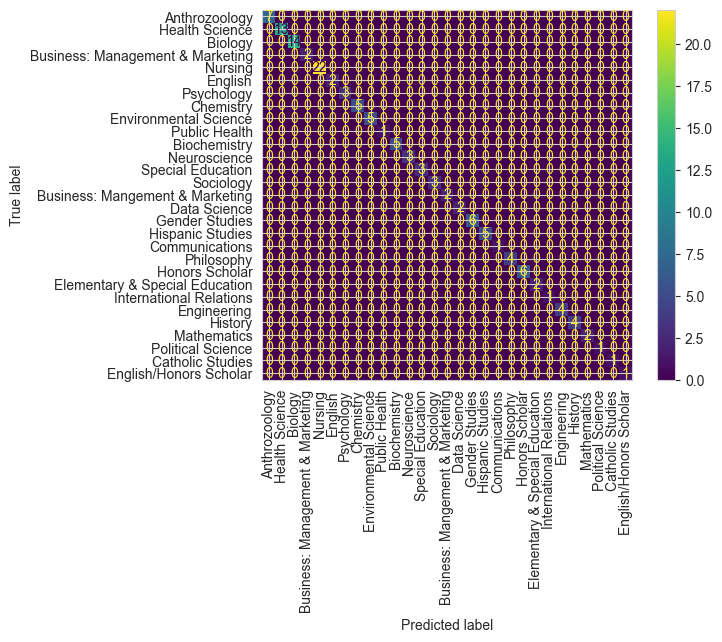

In [32]:
v = CountVectorizer(stop_words='english')

Xtrain = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
# Xtest = v.transform(inputs_Test)          # Just transform the test set (don't use it to build vocabulary)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)
# print("test score:", nb_count_test_score)

plot_confusion(model, Xtrain, Ytrain, label = ['Anthrozoology', 'Health Science', 'Biology',
       'Business: Management & Marketing', 'Nursing', 'English',
       'Psychology', 'Chemistry', 'Environmental Science',
       'Public Health', 'Biochemistry', 'Neuroscience',
       'Special Education', 'Sociology',
       'Business: Mangement & Marketing', 'Data Science',
       'Gender Studies', 'Hispanic Studies', 'Communications',
       'Philosophy', 'Honors Scholar', 'Elementary & Special Education',
       'International Relations', 'Engineering', 'History', 'Mathematics',
       'Political Science', 'Catholic Studies', 'English/Honors Scholar'])

The confusion matrix shows us that our trained model is successful because it guessed everything correctly. Also, it shows that the Nursing program has the most SURF projects. However, one of the reasons that it is successful is that this model might be overfitted. Grouping this topic into groups might be something to look at.

## 2

In [33]:
STEM = ['Biology','Chemistry','Biochemistry','Neuroscience','Environmental Science','Engineering','Mathematics','Data Science']
Health_Sciences=['Health Science','Nursing','Public Health']
Social_Sciences=['Psychology','Sociology','Political Science','International Relations','Philosophy','History','Gender Studies', 'Hispanic Studies','Catholic Studies']
Business = ['Business: Management & Marketing','Communications','Business: Mangement & Marketing']
Education_Studies = ['Special Education','Elementary & Special Education','English','English/Honors Scholar','Honors Scholar', 'Anthrozoology']
df3['Clumped'] = df3['Topic']
for i in range(len(df3['Topic'])):
    if df3['Topic'][i] in STEM:
        df3['Clumped'][i] = "STEM"
    elif df3['Topic'][i] in Health_Sciences:
        df3['Clumped'][i] = "Health Science"
    elif df3['Topic'][i] in Social_Sciences:
        df3['Clumped'][i] = "Social Science"
    elif df3['Topic'][i] in Business:
        df3['Clumped'][i] = "Business"
    else:
        df3['Clumped'][i] = "Education Studies"

pd.options.mode.chained_assignment = None  # default='warn'
df3.head()
        
    

,Name,Topic,Title,Abstract,Clumped
0,Natalie Powell,Anthrozoology,Pseudo Narcotic Generalization in Canines,Dogs have around three hundred million olfacto...,Education Studies
1,Bersabeh Zellele,Health Science,Physiological and mental health effects of the...,The Ethiopian civil war that erupted in Novemb...,Health Science
2,"Juliette Crichton, Kylie Kuga, Kaden Kastner",Biology,Injury History and its Effects on the Metaboli...,"In this advanced research experiment, metaboli...",STEM
3,"Lance Greany, Ryan Croft, Griffin Teuber, Robe...",Business: Management & Marketing,Ten Mile Creek Brewery Process Optimization us...,Using the D-M-A-I-C Six Sigma methodology of D...,Business
4,"Tessa Hoover, Elizabeth Heuiser, Marlisa Meije...",Nursing,The cognitive impact of concussions,Concussions are an increasing concern amongst ...,Health Science


train score: 1.0


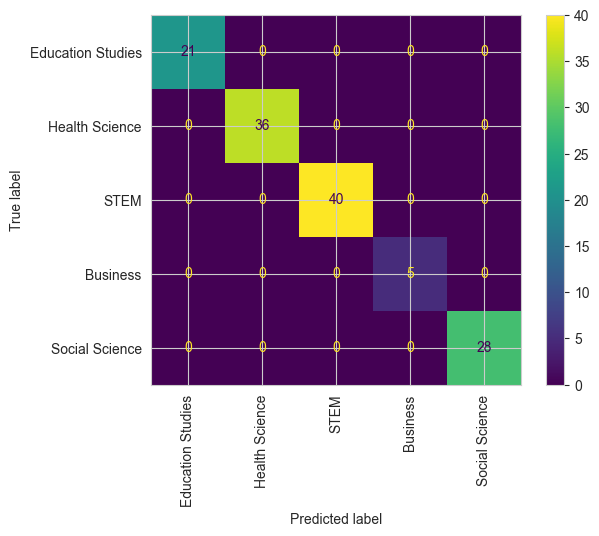

In [34]:
inputs_Train = df3['Abstract']
Ytrain = df3['Clumped']
v = CountVectorizer(stop_words='english')

Xtrain = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
# Xtest = v.transform(inputs_Test)          # Just transform the test set (don't use it to build vocabulary)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)
# print("test score:", nb_count_test_score)

plot_confusion(model, Xtrain, Ytrain, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
       'Social Science'])

| STEM | Health Science | Social Sciences  | Business | Education Studies              |
|------|----------------|------------------|-----------|--------------------------------|
| Biology | Health Science | Political Science | Business: Management & Marketing | Special Education |
| Biochemistry | Nursing        | Psychology       | Communications | Elementary & Special Education |
| Neuroscience | Public Health  | Sociology        | Business: Mangement & Marketing | English |
| Chemistry |                | International Relations        | | English/Honors Scholar |
| Environmental Science |                |          Philosophy        | | Honors Scholar |
| Engineering |                |           History       | | Anthrozoology |
| Mathematics |                |          Gender Studies        | | |
| Data Science |                |           Hispanic Studies       | | |
|  |   | Catholic Studies | | |


In this part, we divided the topics into five groups: STEM, Health Science, Social Science, Business, and Education Studies. In this part, topics are divided into five groups using logical connections between the topics and similarities in order to allow the algorithm to make easier connections. The logic is to keep similar topics in the same group.

## 3

### a)

train score: 1.0


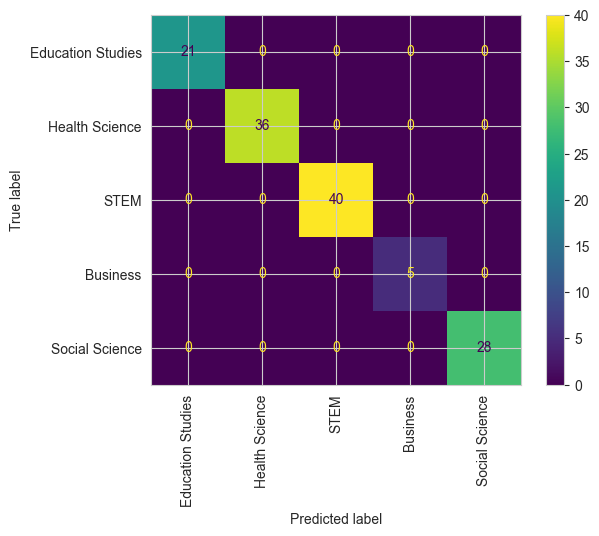

In [35]:
df3['Test'] = df3['Title'] + " " + df3['Abstract']
inputs_Train = df3['Test']
Ytrain = df3['Clumped']
v = CountVectorizer(stop_words='english')

Xtrain = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
# Xtest = v.transform(inputs_Test)          # Just transform the test set (don't use it to build vocabulary)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)
# print("test score:", nb_count_test_score)

plot_confusion(model, Xtrain, Ytrain, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
       'Social Science'])

This model is the first model and uses CountVectorizer with removed stop words. It has a \%100 success rate on the Surf 2024 dataset.

In this part, there were not any changes in between predicting the model using the Project Title and Project Abstract and just using the Project Abstract because they both had \%100 success rate. The only downside of our model is there are only five projects in the business group, which might be an issue with different data. However, using the Project Title with the Project Abstract is going to provide a larger vocabulary for our vector, which is going to help with different data sets.

### b)

train score: 0.9461538461538461


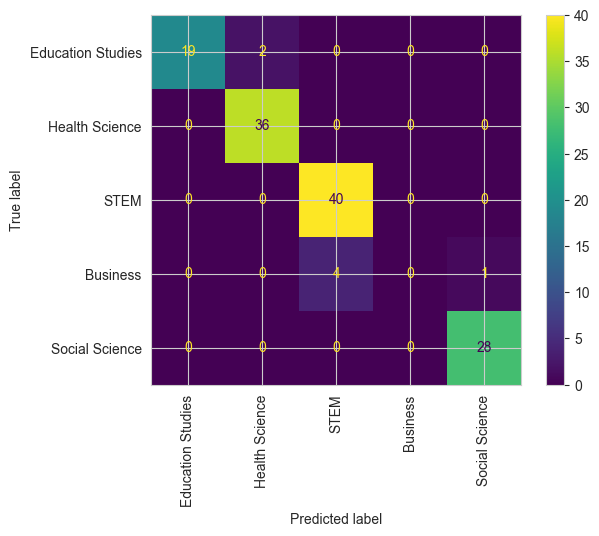

In [36]:
v = TfidfVectorizer(stop_words='english')
Xtrain = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
# Xtest = v.transform(inputs_Test)          # Just transform the test set (don't use it to build vocabulary)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)
# print("test score:", nb_count_test_score)

plot_confusion(model, Xtrain, Ytrain, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
       'Social Science'])

This model uses Tf-idf vectorizer, and it is not successful at predicting topics as a Count Vectorizer because the success rate dropped almost \%5. This shows that there are not many repeated words in these Project Titles and Abstracts because if it was Tf-idf Vectorizer, it would be more successful. However, because, in the Part 4, this model is got to get used with bigger data, it would be better to use TF-idf Vectorizer.

### c)

train score: 1.0


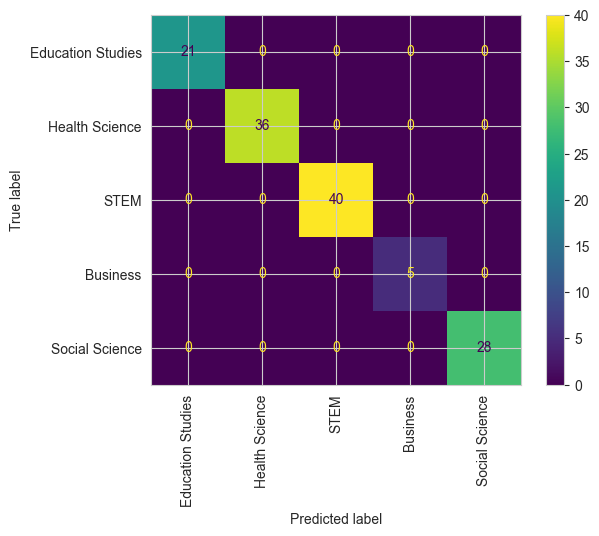

In [37]:
v = CountVectorizer(stop_words='english')

Xtrain = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
# Xtest = v.transform(inputs_Test)          # Just transform the test set (don't use it to build vocabulary)

model = ComplementNB()
model.fit(Xtrain, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)
# print("test score:", nb_count_test_score)

plot_confusion(model, Xtrain, Ytrain, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
       'Social Science'])

This model uses a Complement Naive Base Modifier, and it does not affect the model's success rate with the Multinomial Naive Base model. However, the previous model kind of concludes that the frequency of the words in this data set is insignificant. Therefore, continuing the Complement Naive Bayes model would be more logical.

## d)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_Train, Ytrain, test_size=0.2, random_state=2)

train score: 1.0
test score: 0.9230769230769231


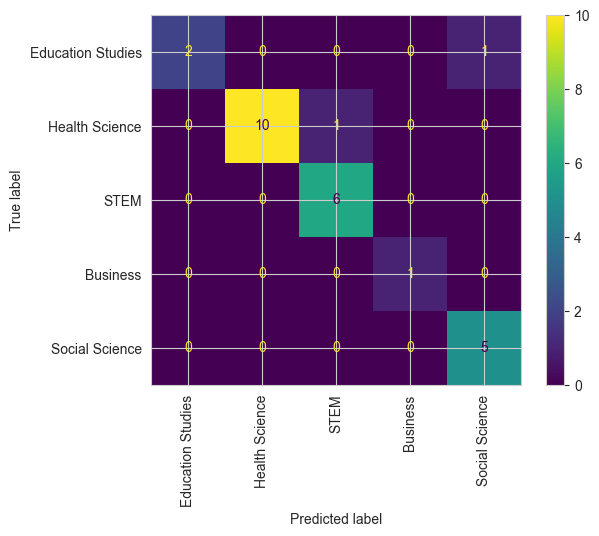

In [39]:
v = TfidfVectorizer(stop_words='english')
# v = TfidfVectorizer(stop_words='english')

trainedX = v.fit_transform(X_train)    # Build the vocabulary and transform training set to vector representation
testX = v.transform(X_test)          # Just transform the test set (don't use it to build vocabulary)

model = ComplementNB()
model.fit(trainedX, y_train)

nb_count_train_score = model.score(trainedX, y_train)
print("train score:", nb_count_train_score)
nb_count_test_score = model.score(testX, y_test)
print("test score:", nb_count_test_score)

# plot_confusion(model, trainedX, y_train, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
#        'Sociology'])
plot_confusion(model, testX, y_test, label = ['Education Studies', 'Health Science', 'STEM', 'Business',
       'Social Science'])

This confusion matrix shows the testing results of the model from the testing and training split. Even though it kind of helps to see how the model works on unseen data. It limits the model’s training because the SURF 2024 data set is not large enough. Therefore, it is better to use data on training rather than testing.

## 4)


In [40]:
df2['Year'] = 2023
df1['Year'] = 2022

In [41]:
dfCombined = pd.concat([df1, df2], axis = 0)

In [42]:
dict = {' Cash, Dane':"Social Science", ' Heiser, Patricia':"STEM", ' Parsley, Kelly':"Health Science", ' Hansen, Alan':"Buisness", ' Hahn, Alyssa':"STEM", ' DeMello, Margo':"Education Studies", ' Fischer, Gary':"STEM", ' Sullivan, Eric':"STEM", ' Carpenter, Chrissie':"STEM", ' Rowley, John':"STEM", ' Street, Alexander':"Social Science", ' Pharr, Caroline':"STEM", ' Burkholder, Stephanie':"Health Science", ' Hitt, David':"STEM", ' Kukulski, Melissa':"Health Science", ' Suthers, Marie':"Education Studies", ' Roncalli, Elvira':"Social Science", ' Hokit, Grant':"STEM", ' Fregulia, Jeanette':"Social Science", ' Beck, Ashley':"STEM", ' Smillie, Mark':"Social Science", ' Glowienka, Edward':"Social Science", ' Otto-Hitt, Stephanie':"STEM", ' Street, Alex':"Social Science", ' Wendt, Theodore':"STEM", ' Dimian, Adel':"Buisness", ' Cloninger, Mary':"STEM", ' Schafer, Gerald':"Health Science", ' Pavlakis, Dean':"Social Science", ' Fasteen, Jodi':"STEM", ' Honzel, Nikki':"Social Science", ' Kulkuski, Melissa':"Health Science",' Otto-Hitt, Stefanie':"STEM", ' Almquist, Travis':"STEM", ' Graham, Loren':"Education Studies", ' Sumridge, Molly':"Education Studies", ' Shafer, Gerald':"Health Science", ' Meyer, Eric':"Social Science", ' Street, Alexabder':"Social Science", ' Hahn, Dr. Alyssa':"STEM", ' Sheafor, Brandon':"STEM", ' Hallows, Ryan':"Education Studies", ' Christian, Patricia':"Social Science", ' Crohas, Julie':"Education Studies", ' Johnson, Jeremy':"Social Science", ' Jones, Charlotte':"Buisness", ' Restrepo-Mesa, Sergio':"Education Studies", ' Gilboy, Kathy':"Education Studies", ' Greiner, Katherine':"Social Science", ' Dean':"Social Science", ' Hogue, Meagan':"Health Science", ' Gupta, Soumitree':"Education Studies", ' Wendt, Ted':"STEM", ' Melissa, Lewis':"Health Science", ' Lewis, Melissa':"Health Science", ' Brosnan, Maria':"Health Science", ' Cline, Kelly':"STEM", ' Miller, Christine':"Health Science"}

In [43]:
dfCombined = dfCombined.reset_index(drop=True)

In [44]:
dfCombined['Topic'] = "NA"
for i in range(len(dfCombined['author'])):
    # print(dfCombined['author'][0]+"1")
    temp = dfCombined['author'][i]
    # temp = temp.split(';')
    profs = temp.split(";")
    for prof in dict.keys():
        if prof in profs:
            # print(prof)
            dfCombined['Topic'][i] = dict.get(prof)
dfCombined['Topic'].value_counts()

Topic
Health Science       86
STEM                 84
Social Science       44
Education Studies    16
Buisness              7
NA                    3
Name: count, dtype: int64

In [45]:
dfCombined = dfCombined[dfCombined['Topic'] != "NA"]

In [46]:
dfCombined = dfCombined.reset_index(drop=True)
for i in range(len(dfCombined['Topic'])):
    # print(dfCombined['Topic'][i])
    if dfCombined['Topic'][i] == "Buisness":
        dfCombined['Topic'][i] = "Business"
dfCombined['Topic'].value_counts()

Topic
Health Science       86
STEM                 84
Social Science       44
Education Studies    16
Business              7
Name: count, dtype: int64

### a)

In [47]:
v = TfidfVectorizer(stop_words='english')
# v = TfidfVectorizer(stop_words='english')

trainedX = v.fit_transform(inputs_Train)    # Build the vocabulary and transform training set to vector representation
testX = v.transform(X_test)          # Just transform the test set (don't use it to build vocabulary)

model = ComplementNB()
model.fit(trainedX, Ytrain)

nb_count_train_score = model.score(Xtrain, Ytrain)
# nb_count_test_score = model.score(Xtest, Ytest)
print("train score:", nb_count_train_score)

train score: 1.0


train score: 0.8227848101265823


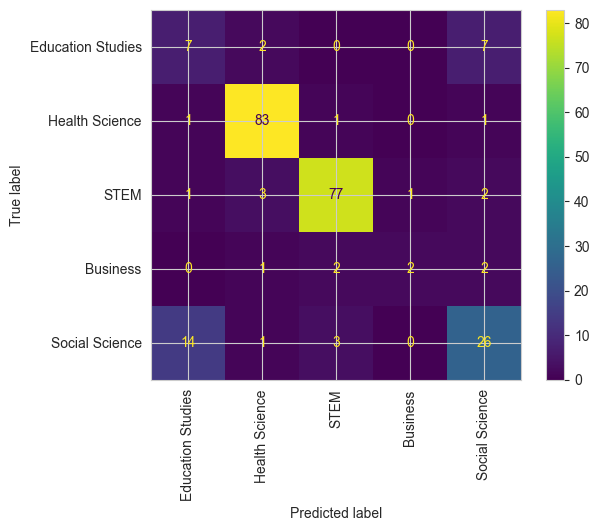

In [48]:
X = dfCombined['abstract'] + ' ' + dfCombined['title']
trainedX = v.transform(X)    # Build the vocabulary and transform training set to vector 
# trainedX = v.transform(dfCombined['abstract']) 

nb_count_train_score = model.score(trainedX, dfCombined['Topic'])
print("train score:", nb_count_train_score)

plot_confusion(model, trainedX, dfCombined['Topic'], label = ['Education Studies', 'Health Science', 'STEM', 'Business', 'Social Science'])

The chart above shows the confusion matrix of the final model. The final model uses a Tf-idf Vectorizer with a Complement Naive Bayes probabilistic classifier. The final model has a \%82.28 success rate in predicting the data, which is a combination of the SURF 2022 and 2023. According to the confusion matrix given above, it is bad at predicting Business topics, which is kind of normal because there are not enough projects in the business group. Also, this model does not differentiate Education Studies from Social Sciences.

### b)

In [49]:
predicted = model.predict(trainedX)

dfCombined["Prediction"] = predicted

dfCombined["Check"] = "NA"


In [50]:
dfCombined = dfCombined.reset_index(drop=True)

In [51]:
for i in range(len(dfCombined)):
    if dfCombined.loc[i, 'Prediction'] != dfCombined.loc[i, 'Topic']:
        dfCombined.loc[i, 'Check'] = "False"
    else:
        dfCombined.loc[i, 'Check'] = "True"

In [52]:
len(dfCombined[dfCombined['Check'] == "False"][['title', 'Prediction', 'Topic']])

42

In [53]:
len(dfCombined[(dfCombined['Check'] == "False") & (dfCombined['Year'] == 2022)][['title', 'Prediction', 'Topic']])

10

In [54]:
dfCombined[dfCombined['Check'] == "False"][['title', 'Prediction', 'Topic', 'Year']]

,title,Prediction,Topic,Year
3,Accessibility Scan of Carroll College,Education Studies,Health Science,2022
4,Misguided Praxis: Twitter’s Response to Justin...,Social Science,Business,2022
9,An Analysis of the Representation of Swans in ...,Social Science,Education Studies,2022
23,Hippotherapy as a Treatment Tool,Health Science,Education Studies,2022
30,"Why Our Education Is “Not for School, but for ...",Education Studies,Social Science,2022
32,The Role of Sex Education in Victim Blaming,Education Studies,Social Science,2022
48,The Possibility of Improvement of the Human Co...,Education Studies,Social Science,2022
52,How To Support a Survivor,Social Science,Health Science,2022
81,What is Most Necessary to Improve the Human Co...,Education Studies,Social Science,2022
93,Factors Influencing Test Performance,STEM,Social Science,2022


This chart shows the wrong predictions of the final model by Project Title and Project Year. According to this chart, the final model made 42 wrong predictions while predicting the SURF Projects. Interestingly, only ten of them are from 2022. This means it would be essential to focus on this dataset more while training it. This means undergraduates from 2022 and 2024 have more similarities in their SURF Projects than undergraduates from 2023.